# SVM案例1
- 演示线性核函数、多项式核函数、高斯核函数

## 1.演示Sklearn中的SVM
- 用代码生成有2个特征，包含2个类别的数据集，用线性核函数构建SVM，画出分隔超平面

### 导入包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### 定义画图函数
- 用于画出不同类别的数据分布、分隔超平面，支持向量

- clf：一个训练好的分类器对象，该对象需要有一个predict方法和一个support_vectors_属性。
- X：特征数据，一个二维数组，其中每一行是一个样本，每一列是一个特征。
- y：目标标签，一个一维数组，包含每个样本的类别标签。
- h：网格的步长，用于创建用于绘制决策边界的网格。默认值为0.02。
- draw_sv：一个布尔值，指示是否绘制支持向量。默认值为True。

In [2]:
def plot_hyperplane(clf, X, y, #
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

### 生成数据
- 使用make_blobs生成具有2个特征的数据集，100个数据
- make_blobs是聚类数据集，用以生成不同的簇

In [3]:
from sklearn.datasets import make_blobs #make_blobs是聚类数据集，用以生成不同的簇

X, y = make_blobs(n_samples=100, centers=2, # 指定以两个点为中心，生成100个二维数据点
                  random_state=0, cluster_std=0.3)#random_state为随机种子，确保每次生成的数据是一样的；cluster_std为标准差


### 构建模型，画出分隔平面

- 使用sklearn.svm下的SVC构建分类SVM模型
- sklearn.svm下的SVM分为分类SVM（SVC函数），和回归SVM（SVR函数），分别解决SVM的分类和回归问题
- 通过kernel指定核函数的类别，“linear”为线性核函数，“poly”为多项式核函数，“rbf”为高斯核函数

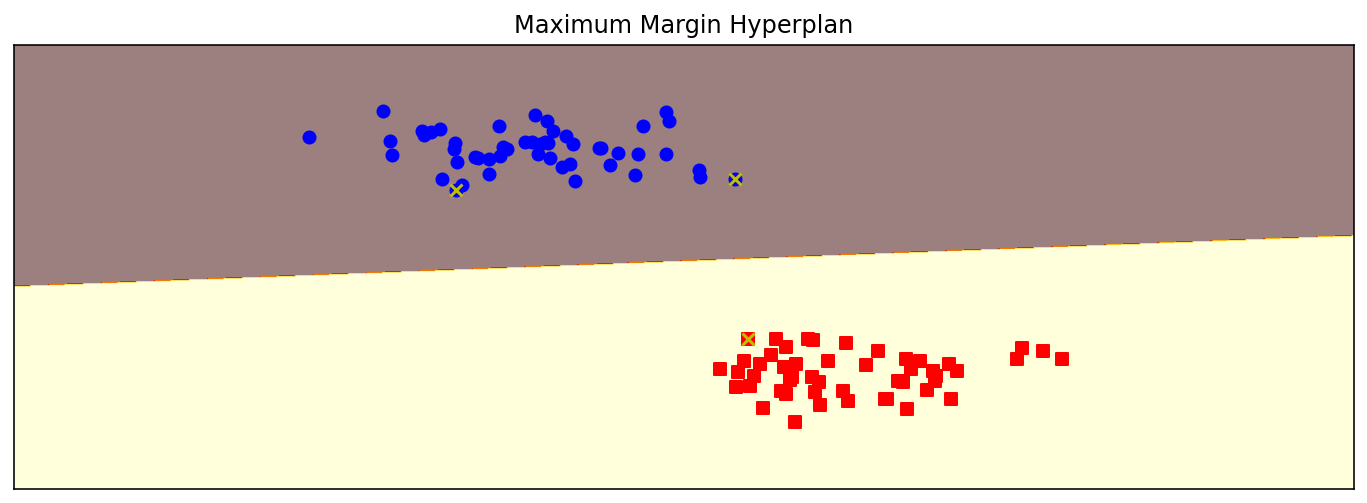

In [4]:
from sklearn import svm
clf = svm.SVC(C=1.0, kernel='linear')#指定核函数的类别为线性核函数
clf.fit(X, y)

plt.figure(figsize=(12, 4), dpi=144)
plot_hyperplane(clf, X, y, h=0.01, 
                title='Maximum Margin Hyperplan')#画出分隔超平面，支持向量和不同的类别

 上图中标记'X'的是支持向量

## 2.线性核函数和非线性核函数的比较
- 代码生成一个包含2个特征，3个类别的数据集
- 构造4个SVM算法拟合数据，比较线性核函数、多项式核函数和高斯核函数
- sklearn中对于线性核函数，需要指定惩罚系数C，表示对不符合最大间距规则的惩罚力度
- sklearn中对于多项式核函数，需要指定C和degree，degree表示多项式的阶数
- sklearn中对于高斯核函数，需要指定C和gama值，gama表示高斯核函数公式中的1/2𝜎^2

生成包含三个类别的数据集

In [5]:
from sklearn import svm
from sklearn.datasets import make_blobs

#生成数据集
X, y = make_blobs(n_samples=100, centers=3, 
                  random_state=0, cluster_std=0.8)

使用三种不同的核函数分别构建4个SVM
- svm.SVC(C=1.0, kernel='linear') 惩罚系数为1的线性核函数
- clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)阶数为3的多项式核函数
- clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)gamma为0.5的高斯核函数
- clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)gamma为0.1的高斯核函数

In [6]:
#定义一个线性核函数的SVM，C是优化目标函数中的系数R
clf_linear = svm.SVC(C=1.0, kernel='linear')
#定义一个C=1，3阶多项式核函数的SVM，degree是多项式阶数
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
#定义一个C=1，γ=0.5高斯核函数的SVM
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
#定义一个C=1，γ=0.1高斯核函数的SVM
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

可视化分隔平面

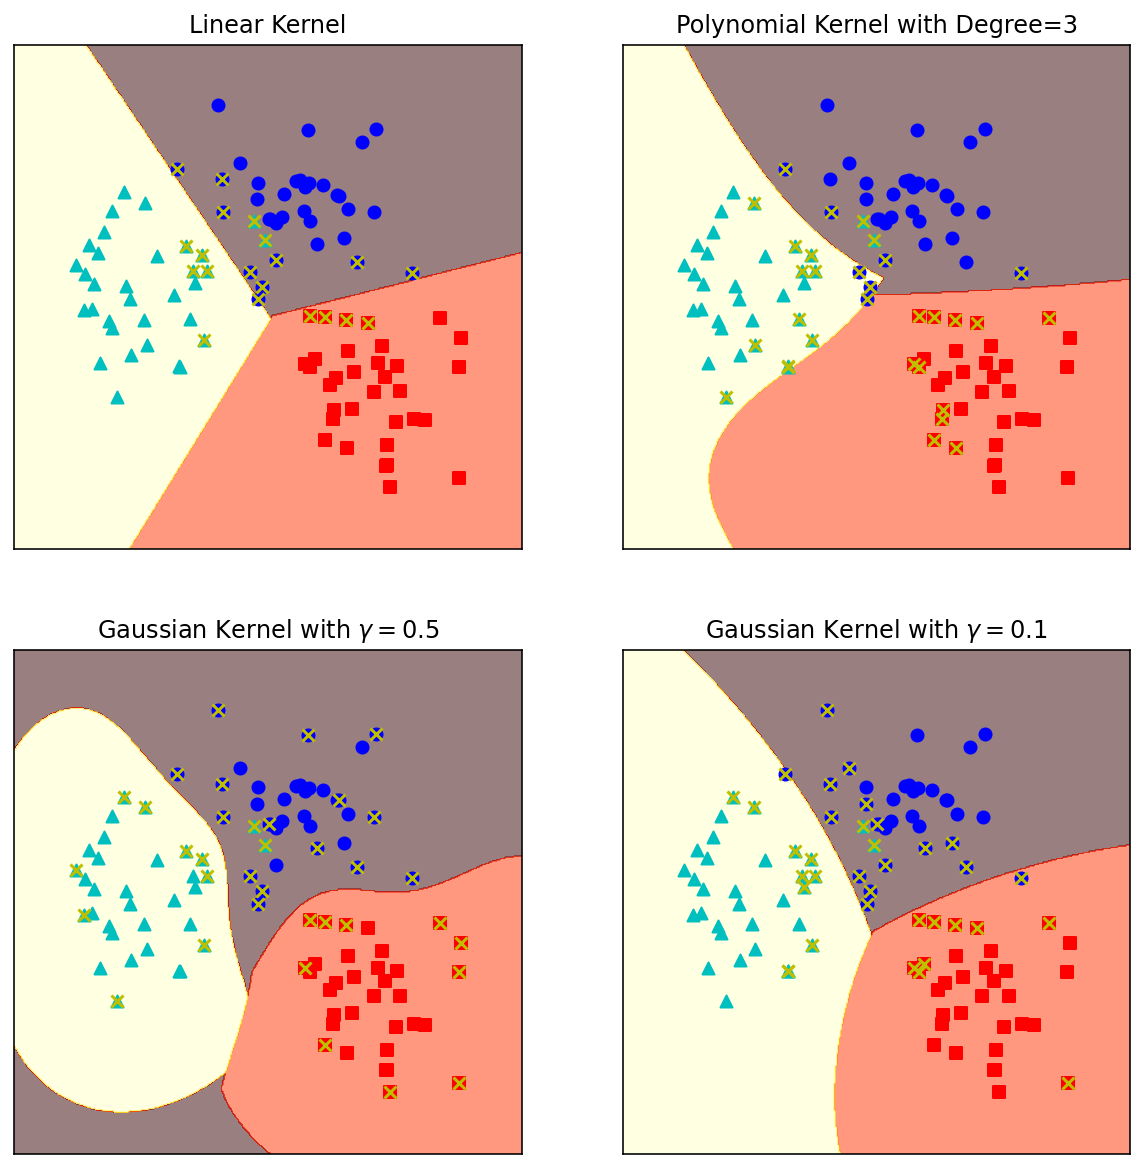

In [7]:
plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
#依次比较不同的核函数预测结果，画出分隔平面
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])

图中带x标记的为支持向量，左上角为线性核函数，只能拟合出直线分隔超平面；右上角是三阶多项式核函数，能拟合出复杂的曲线分隔超平面；左下角是gama=0.5的高斯核函数，右下角是gama=0.1的高斯核函数，调整gama值，可以改变分隔超平面的形状；gama太大容易造成过拟合，太小会退化成线性核函数；
为什么gama=0.5时，有些很远的点也是支持向量？因为高斯核函数把输入特征映射到了多维空间，在多维空间里，他们是最近的点，但回到二维空间又看起来不是最近的点了